## EDA on Black Friday dataset from Kaggle
Here we will be looking at Data Cleaning and Preparing the data for model training

The data can be found here https://www.kaggle.com/sdolezel/black-friday

In [1]:
# Import Libraries
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize']= (12, 6)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import xgboost as xgb
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# load Dataset
df_train = pd.read_csv('train.csv') # load train dataset
df_test = pd.read_csv('test.csv') # load test dataset

In [3]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [4]:
df_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [5]:
df_train.shape, df_test.shape

((550068, 12), (233599, 11))

In [6]:
# Let merge the two dataset together. To do this we will use append fuction

final_df = df_train.append(df_test)

In [7]:
final_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
final_df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [9]:
# let;s see the shape of this mergwd dataframe
final_df.shape

(783667, 12)

In [10]:
# let's check for missing data
final_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [11]:
# we will drop the user id because it's of no use
final_df.drop(['User_ID'], axis = 1, inplace = True)

In [12]:
# Cat_values = final_df['Product_ID','Gender']
# Num_values = final_df['Product_Category_3','Occupation','Marital_Status','Product_Category_1','Product_Category_3']

In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  object 
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  object 
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          537685 non-null  float64
 9   Product_Category_3          237858 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 71.7+ MB


In [14]:
final_df['Product_Category_3'].mode()[0]

16.0

In [15]:
## Fill missing values for Product_Category_1 with mode
final_df['Product_Category_1'] = final_df['Product_Category_1'].fillna(final_df['Product_Category_1'].mode()[0])

In [16]:
## Fill missing values in Product_Category_2 with mode
final_df['Product_Category_2'] = final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [17]:
## Fill missing values in Product_Category_2 with mode
final_df['Product_Category_3'] = final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

## Question
1. Which of the Gender did more shopping during black friday by Age?
2. Let's look at the Occupation of this Shoppers
3. The Marital Status of the Shoppers
4. Let's check for the city_category that shopped more during the black friday sells

C:\Users\oriji sandra\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

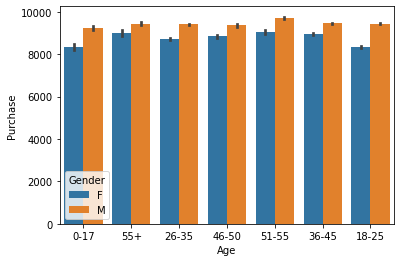

In [18]:
# Answer 1. From the chat we can see that the Male shopped more during black friday season. And the higest Age 
# bracket that shopped more is between the Age of 51 - 55.
# Also from this data i can conclude that Male are good shoppers.
sns.barplot('Age', 'Purchase', hue='Gender', data=final_df)

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

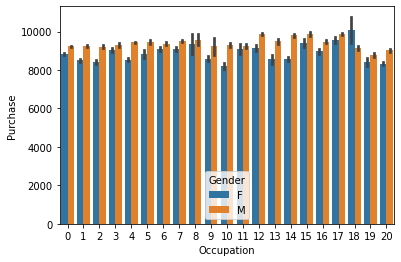

In [19]:
# Answer we have 20 unique occupation and from the data we can see that those who belong to category 18 are the highest shoppers
sns.barplot(x = 'Occupation', y = 'Purchase', hue='Gender', data=final_df)

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

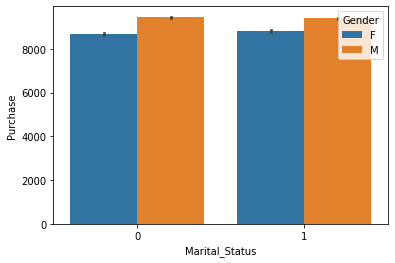

In [20]:
# Answer it seems both Marital Status have a level ground for purchase
sns.barplot(x = 'Marital_Status', y = 'Purchase', hue='Gender', data=final_df)

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

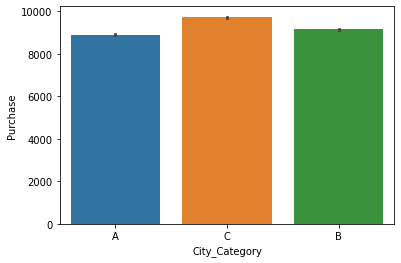

In [21]:
# From the chat City_Category C had the highest shopping experience
sns.barplot(x = 'City_Category', y = 'Purchase', data=final_df)

In [22]:
# Let's encode categorical data
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057.0
4,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969.0


In the data above, we can see that it contains only two (3) categorical variables. They are:

1. Age
2. Gender and 
3. City_Category

Also if you look at `Stay_In_Current_City_Years` feature we can see that it contain `14+` that also needs to be fixed

Let's work on encoding them

Note:

Encoding data is not for data anlysis and visualization. We encode our data only when we want run our data in a machine learning algorithm because machine algorithm accepts numerical data only.

In [23]:
final_df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [24]:
# To encode categorical data i will use map function
final_df['Age'] = final_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
final_df['City_Category'] = final_df['City_Category'].map({'A':1,'B':2,'C':3})
final_df['Gender'] = final_df['Gender'].map({'M':1,'F':2})

In [25]:
# We are having a string value in Stay_In_Current_City_Years as 4+, let's fix that too
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\oriji sandra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [26]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,2,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,2,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,2,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,2,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 87.9+ MB


`Stay_In_Current_City_Years` is still in a type object (categorical). Let's change that to a type of `int`. 
Remember our machine learning algorithm recognises only numerical dtype

In [28]:
# changing the dtype to int
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].astype('int')

In [29]:
# Let's split our data to it's original form. That is train and train
# df_test=final_df[final_df['Purchase'].isnull()]
# df_train=final_df[~final_df['Purchase'].isnull()]
df_train=final_df[~final_df['Purchase'].isnull()]
df_test=final_df[final_df['Purchase'].isnull()]

In [30]:
df_train.shape,df_test.shape

((550068, 11), (233599, 11))

In [31]:
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,2,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,2,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,2,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,2,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,3,4,0,8,8.0,16.0,7969.0


In [32]:
X=df_train.drop(['Purchase','Product_ID'],axis=1)

In [33]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,2,1,10,1,2,0,3,8.0,16.0
1,2,1,10,1,2,0,1,6.0,14.0
2,2,1,10,1,2,0,12,8.0,16.0
3,2,1,10,1,2,0,12,14.0,16.0
4,1,7,16,3,4,0,8,8.0,16.0


In [34]:
X.shape

(550068, 9)

In [35]:
y = df_train['Purchase']

In [36]:
y.shape

(550068,)

### Data Standardization

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# let's scale our data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

###  Data Modeling

In [39]:
#Train our model
#To train the data we will use linearRegression or xgboost
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.05,
                max_depth = 5, alpha = 10, n_estimators = 1000)

In [40]:
# model = LinearRegression()

In [41]:
model.fit(X_train,y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
#predict on training dataset
pred_train = model.predict(X_train)

In [43]:
pred_train

array([ 7438.539 , 14291.865 ,  7239.5366, ...,  5750.1865,  7120.255 ,
        5848.465 ], dtype=float32)

In [44]:
#predict on test dataset
pred_test = model.predict(X_test)

In [45]:
pred_test

array([14252.724 , 13407.685 ,  7241.9595, ..., 13168.706 , 10663.75  ,
        6167.124 ], dtype=float32)

In [46]:
# predict on test
RMSE_test = mean_absolute_error(y_test, pred_test)

In [47]:
print(f'My pred on test data: {RMSE_test}')

My pred on test data: 2220.095900063874


In [48]:
# predict train
RMSE_train = mean_absolute_error(y_train, pred_train)

In [49]:
print(f'My pred on train data: {RMSE_train}')

My pred on train data: 2203.879100654439
